# PROBLEM 4

We have $n$ chains with $N$ spins in each, obeying periodic boundary conditions.
Hamiltonian:
\begin{equation}
    H=-J_{\parallel}\sum_{m=1}^{n}\sum_{i=1}^{N}\sigma_{m,i}\sigma_{m,i+1} - J_{\perp}\sum_{m=1}^{n}\sum_{i=1}^{N}\sigma_{m,i}\sigma_{m+1,i} -B\sum_{m=1}^{n}\sum_{i=1}^{N}\sigma_{m,i}
\end{equation}
Here $\sigma_{m, N+1}=\sigma_{m, 1}$ and $\sigma_{n+1, i}=\sigma_{1, i}$. This corresponds to wrapping the two dimensional surface of the chains around a torus.

### a) Every possible spin-configuration for one chain
For a given $i$ in $\{1, 2, ..., N\}$, we want to generate every possible spin state for the $i$-th component of the $n$ chains. One systematic way to do this, is to consider all binary numbers up to $2^{n}$ (these can be expressed with $n$ digits), and make spin up/down correspond to $1$ or $0$.

In [1]:
import numpy as np

def genAllStates(n):
    #int n = number of chains
    #returns: 2^n x n array (int)
    
    #Initially, place all spins up
    states = np.ones((2**n, n), dtype=int)
    intToBin = lambda n: bin(n)[2:]
    for i in range(2**n):
        #Convert i into a binary string with appropriate amount of zeros in front
        b = intToBin(i)
        b = b.zfill(n)
        for j in range(n):
            #Subtract the j-th digit of the binary representation of i for all j spins of spin state no. i
            states[i][j] -= 2*int(b[j])
    return states

In particular, the case n=5 yields:

In [2]:
print(genAllStates(5))

[[ 1  1  1  1  1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1  1]
 [ 1  1  1 -1 -1]
 [ 1  1 -1  1  1]
 [ 1  1 -1  1 -1]
 [ 1  1 -1 -1  1]
 [ 1  1 -1 -1 -1]
 [ 1 -1  1  1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1  1 -1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1 -1  1  1]
 [ 1 -1 -1  1 -1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1]
 [-1  1  1  1  1]
 [-1  1  1  1 -1]
 [-1  1  1 -1  1]
 [-1  1  1 -1 -1]
 [-1  1 -1  1  1]
 [-1  1 -1  1 -1]
 [-1  1 -1 -1  1]
 [-1  1 -1 -1 -1]
 [-1 -1  1  1  1]
 [-1 -1  1  1 -1]
 [-1 -1  1 -1  1]
 [-1 -1  1 -1 -1]
 [-1 -1 -1  1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1]]


### b) Transfer matrix $P$
For a single lattice site $\tau_{i}$:
\begin{equation}
    P_{\tau_{i}\tau_{i+1}} = exp\left[\beta J_{\parallel} \sum_{k=1}^{n} \sigma_{i}^{(k)}\sigma_{i+1}^{(k)} + \beta J_{\perp} \sum_{k=1}^{n}\sigma_{i}^{(k)}\sigma_{i}^{(k+1)} + \frac{\beta B}{2}\sum_{k=1}^{n}(\sigma_{i}^{(k)}+\sigma_{i+1}^{(k)})\right]
\end{equation}
can be expressed as a $2^{n}\times2^{n}$ -matrix with all the possible (binary) combinations of $\sigma_{i}^{(k)}$ and $\sigma_{i+1}^{(k)}$ for $k=\{1, 2, ..., n\}$. I.e. $P_{\tau_{i}\tau_{i+1}} \rightarrow P_{l,m}$ for $l, m \in \mathbb{N}$.

Using periodic boundary conditions, we sidestep possible issues with the above sums running out of of indices. Also, there is no inert connection between lattice sites $i$ and $i+1$ before we determine it with the Hamiltonian, so we may assume the energy contribution between such sites is the same for all pairs. As such, $P = P_{\tau_{i}\tau_{j}}$ for some lattice sites $\tau_{i}$ and $\tau_{j}$, and is non-zero for all $j=i+1$. Otherwise, $P$ is independent of $i$.

In [17]:
#Parameters
Jpar = 1
Jperp = 1
B = 1e-2
beta = 0.5 #Dummy value

#Matrix element (l,m)
def P_lm(l, m, n, beta):
    #int l, m = row & column position in P
    #int n = number of chains
    #returns: float
    
    #Select a possible spin state given by l and k (NB! 0-indexed)
    states = genAllStates(n)
    sig = lambda l, k: states[l][k]
    #Sums in Hamiltonian
    Spar, Sperp, Smag = 0, 0, 0
    for k in range(n):
        Spar += sig(l, k)*sig(m, k)
        Sperp += sig(l, k)*sig(m, (k+1)%n)
        Smag += sig(l, k) + sig(m, k)
    return np.exp( beta*Jpar*Spar + beta*Jperp*Sperp + 1/2*beta*B*Smag )

#Generate matrix
def P(n, beta):
    #int n = number of chains
    #returns: 2^n x 2^n array (float)
    
    mat = np.zeros((2**n, 2**n))
    for l in range(2**n):
        for m in range(2**n):
            mat[l][m] = P_lm(l, m, n, beta)
    return mat

NB: The matrices $P$ are symmetric, so one could save time by only computing the upper/lower triangular part of $P$.

### c) Eigenvalues

Now, I plot (the real part of) all the eigenvalues of a single $P$ for $n$ chains (there are $n$ of them) as a function of $\beta$. The parameters are all set to unity.

/home/svein/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


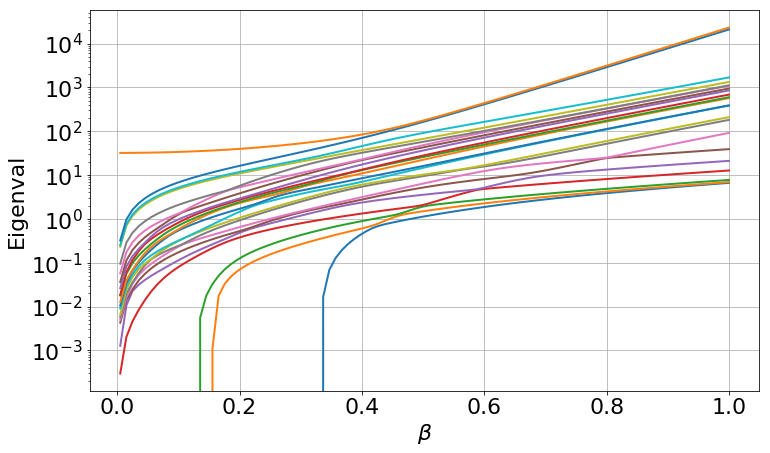

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 7]
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt

#Plot in beta
def plotOverBeta(n):
    #int n = number of chains
    #returns: Nan
    
    num = 100
    betaRange = np.linspace(0.005, 1.0, num)
    plotVals = np.zeros((num,2**n))
    #Solve eigenvalues for every value of beta in the given range
    for i in range(num):
        s, S = np.linalg.eigh(P(n, betaRange[i]))
        plotVals[i] = np.real(s)
    # We end up with 2**n different eigenvalue-plots
    for i in range(2**n):
        plt.semilogy(betaRange, plotVals[:,i], lw=2)
    plt.grid()
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'Eigenval')
    plt.show()
    return None
    
plotOverBeta(5)

We notice that the largest eigenvalue is the largest for all values of $\beta$. This motivates our choice to approximate $Z$ as being only the largest eigenvalue.

### d)

Using the relations given in the exercise text, one can express $m$ like:
\begin{equation}
    m = \frac{1}{n}\frac{\partial}{\partial (\beta B)} ln(\lambda_{n, \text{max}}) = \frac{1}{nB}\frac{\partial}{\partial \beta} ln(\lambda_{n, \text{max}}).
\end{equation}

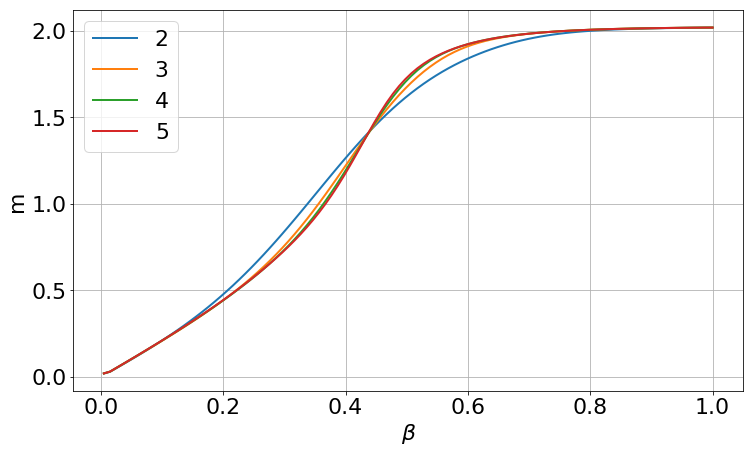

In [24]:
def generateLargestLambda(n):
    num = 100
    betaRange = np.linspace(0.005, 1.0, num)
    Z = np.zeros((num,2**n))
    for i in range(num):
        s, S = np.linalg.eigh(P(n, betaRange[i]))
        #Add eigenvalues to Z
        Z[i] = np.real(s)
    #Return the entire column containing the largest eigenvalue
    return Z[:,np.argmax(Z)%2**n]

def m(n):
    Z = generateLargestLambda(n)
    return 1/(n*B)*np.gradient(np.log(Z))

def plotm():
    for n in range(2,6):
        mag = m(n)
        betaRange = np.linspace(0.005, 1.0, 100)
        plt.plot(betaRange, mag, label=n, lw=2)
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'm')
    plt.grid()
    plt.legend()
    plt.show()

plotm()

### e)

Using the given relations, I calculate and plot
\begin{equation}
\frac{C_{B}(T)}{Nnk_{B}} = \frac{\beta^{2}}{n}\frac{\partial^{2} ln(\lambda_{n, \text{max}})}{\partial \beta^{2}}
\end{equation}
over $\beta$.

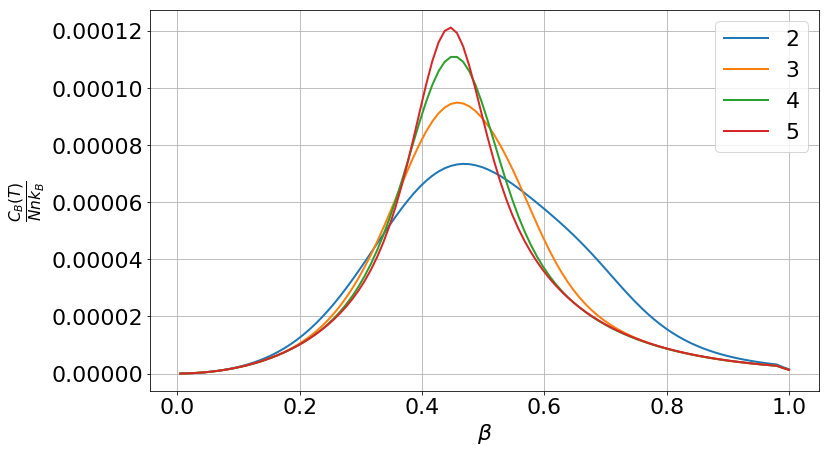

In [25]:
def plotC_B():
    for n in range(2, 6):
        betaRange = np.linspace(0.005, 1.0, 100)
        Z = generateLargestLambda(n)
        plotvals = 1/n * betaRange**2*np.gradient(np.gradient(np.log(Z)))
        plt.plot(betaRange, plotvals, label=n, lw=2)
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$\frac{C_{B}(T)}{Nnk_{B}}$')
    plt.grid()
    plt.legend()
    plt.show()

plotC_B()

The dependence of $C$ on $B$:

Large $|B| \implies C\rightarrow 0$ as the enthalpy is completely dominated by the term $B\sum_{m=1}^{n}\sum_{i=1}^{N}\sigma_{m,i}$ in the Hamiltonian. Any increase in $T$ contributes to kinetic energy, but completely dies out in comparison.

Small $|B|$ means all the terms in $H$ are fairly small, so increasing kinetic energy can give a noticable contribution to enthalpy.

All in all; $C(B)$ decreases symmetrically around the origin.